In [1]:
import pandas as pd

In [8]:
filepath = r"/content/Titanic-Dataset.csv"
try :
  df = pd.read_csv(filepath)
  print("Dataset loaded successfully")
except FileNotFoundError :
  print("Try again. File path does not exist")

Dataset loaded successfully


In [33]:
print(df.head()) #first 5 rows

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [ ]:
print(df.info()) #table contents

In [ ]:
print(df.isnull().sum()) #sum of null values

In [ ]:
age_median  = df['Age'].median()
print(age_median)
df['Age'].fillna(age_median, inplace = True)
print(df.isnull().sum())

In [ ]:
freq = df['Embarked'].mode()[0]
print(freq)
df['Embarked'].fillna(freq, inplace=True)
print(df.isnull().sum())

In [ ]:
categorical_colmns = ['Sex','Embarked']
df = pd.get_dummies(df,columns=categorical_colmns , drop_first=True) #ste true/false based on alphabetical order
print(df.head())

In [36]:
from sklearn.preprocessing import StandardScaler
scaling = ['Age','Fare']
scaler = StandardScaler()
df[scaling]=scaler.fit_transform(df[scaling])
print(df[scaling].describe()) # mean near to 0 , SD near to 1

                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Fare'])
plt.show() #before outliers

Original number of rows: 891
Number of rows after removing outliers: 775


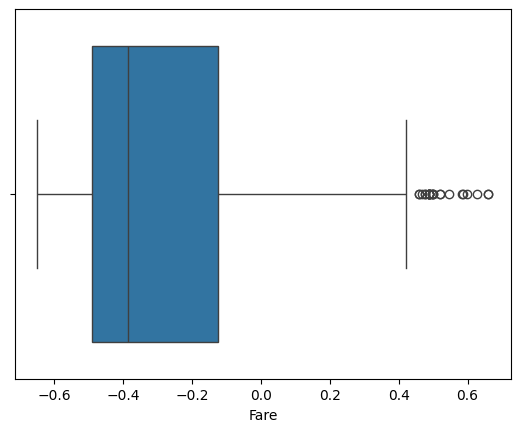

In [39]:
print(f"Original number of rows: {len(df)}")
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print(f"Number of rows after removing outliers: {len(df)}")
#after removing outliers
sns.boxplot(x=df['Fare'])
plt.show()